### Individual performance of 51 participants
Shows each participant's learning curve in the three phases (pre, AI, post), their free-text strategy comments, bonus payment and AI ratings.

In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, MultipleLocator
import statistics
import numpy as np
from common import set_matplotlib_latex, plot_colours, set_axes_length
set_matplotlib_latex()

plot_width = 1.05
plot_height = 0.7

data_path = "../data/ColourCombo_51_anonymised.json"
phase_round_numbers = {
    "pre_treatment": [1, 2, 3],
    "ai": [4, 5, 6, 7, 8, 9],
    "post_treatment": [10, 11, 12]
}
participants_data = []

with open(data_path) as file:
    all_data = json.load(file)
    for participant_data in all_data:
            participants_data.append(participant_data)

In [2]:
def print_participant_info(participant_data):
    print(f"Participant id: {participant_data['id']}")
    print(f"Bonus payment: {participant_data['experimentData']['bonusReward']}")
    # print the AI ratings
    useful_ai_rounds = []
    for round_number in phase_round_numbers["ai"]:
        round_data = participant_data["experimentData"]["roundsData"][round_number]
        useful_ai_rounds.append(float(round_data["usefulAiRound"]))
    print(f"Followed: {participant_data['experimentData']['followedAi']}, Useful: {participant_data['experimentData']['usefulAi']}, Average: {np.round(statistics.mean(useful_ai_rounds), 1)}")
    print(f"Usefulness per round: {useful_ai_rounds}")
    print()
    print(f"Strategy with AI:\n{participant_data['experimentData']['strategyAi']}")
    print()
    print(f"Strategy without AI:\n{participant_data['experimentData']['strategyOwn']}")

def plot_performance_pre_ai_post_per_participant(participants):
    for participant_data in participants:
        print_participant_info(participant_data)
        phases_performances = {}
        for phase, round_numbers in phase_round_numbers.items():
            phase_performances = []
            for round_number in round_numbers:
                round_performance = []
                round_data = participant_data["experimentData"]["roundsData"][round_number]
                min_reward = round_data["landscape"]["minReward"]
                max_reward = round_data["landscape"]["maxReward"]
                for trial in round_data["trials"]:
                    reward = trial["noisyReward"]
                    relative_reward = (reward - min_reward) / (max_reward - min_reward) * 100
                    round_performance.append(relative_reward)
                phase_performances.append(round_performance)
            phase_performances = np.asarray(phase_performances)
            phases_performances[phase] = np.mean(phase_performances, axis=0)
        
        trial_numbers = list(range(1, 21)) 
        for phase, performances in phases_performances.items():
            label = "Pre" if phase == "pre_treatment" else "AI" if phase == "ai" else "Post"
            colour_index = 2 if phase == "pre_treatment" else 3 if phase == "ai" else 4
            plt.plot(trial_numbers, performances, color=plot_colours["distinctColours"][colour_index], label=label)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.gca().xaxis.set_major_locator(FixedLocator([1, 7, 14, 20]))
        plt.gca().yaxis.set_major_locator(MultipleLocator(base=10))
        set_axes_length(plot_width, plot_height)
        plt.show()
        
def plot_histograms_pre_ai_post():
    phases_scores_low = {}
    phases_scores_high = {}
    for phase in phase_round_numbers.keys():
        phases_scores_low[phase] = []
        phases_scores_high[phase] = []
    for participant_data in participants_data:
        phases_scores = {}
        for phase, round_numbers in phase_round_numbers.items():
            for round_number in round_numbers:
                round_score = participant_data["experimentData"]["roundsData"][round_number]["relativeScore"]
                if phase in phases_scores.keys():
                    phases_scores[phase].append(round_score * 100)
                else:
                    phases_scores[phase] = [round_score]
        if participant_data["experimentData"]["recommendationType"] == "low":
            for phase, scores in phases_scores.items():
                phases_scores_low[phase].extend(scores)
        else:
            for phase, scores in phases_scores.items():
                phases_scores_high[phase].extend(scores)
    bins = [0, 20, 40, 60, 80, 100]
    for phase in phase_round_numbers.keys():
        phase_label = "Pre" if phase == "pre_treatment" else "AI" if phase == "ai" else "Post"
        print(phase_label)
        plt.hist([phases_scores_low[phase], phases_scores_high[phase]], bins=bins, label=['Local', 'Global'], color=[plot_colours["local"], plot_colours["global"]])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        set_axes_length(plot_width, plot_height)
        plt.gca().xaxis.set_major_locator(FixedLocator(bins))
        plt.show()

### Mean round scores across the Pre, AI, Post phases

Pre


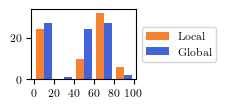

AI


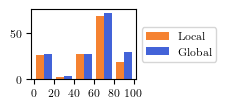

Post


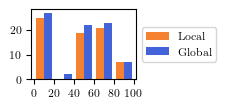

In [3]:
plot_histograms_pre_ai_post()

### Results of participants in the local setting

Participant id: 3
Bonus payment: 1.14
Followed: 6, Useful: 6, Average: 6.2
Usefulness per round: [6.0, 7.0, 6.0, 6.0, 6.0, 6.0]

Strategy with AI:
follow the AI strategies

Strategy without AI:
The AI strategies


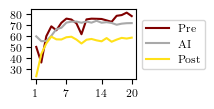

Participant id: 5
Bonus payment: 0.58
Followed: 6, Useful: 4, Average: 3.7
Usefulness per round: [5.0, 4.0, 4.0, 3.0, 3.0, 3.0]

Strategy with AI:
I just used AI suggestions and tried to make suggestions with them

Strategy without AI:
I just tried to make patterns


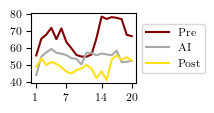

Participant id: 7
Bonus payment: 1.57
Followed: 2, Useful: 5, Average: 4.7
Usefulness per round: [5.0, 5.0, 4.0, 4.0, 5.0, 5.0]

Strategy with AI:
same as above but AI helped me remember what squares were best alreay

Strategy without AI:
going through each rectangle at a time and finding the highest value


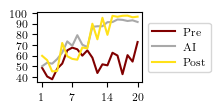

Participant id: 9
Bonus payment: 1.66
Followed: 5, Useful: 5, Average: 5.5
Usefulness per round: [5.0, 6.0, 5.0, 5.0, 6.0, 6.0]

Strategy with AI:
Work out the rectangles that AI was advising on first, and try different combinations until it started giving a consistent recommendation

Strategy without AI:
Focus on each rectangle in turn to try to find the optimal combination through trial and error


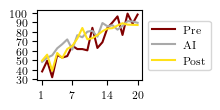

Participant id: 11
Bonus payment: 1.51
Followed: 3, Useful: 5, Average: 3.8
Usefulness per round: [4.0, 2.0, 4.0, 5.0, 4.0, 4.0]

Strategy with AI:
i used the AI solution and amended the other options.

Strategy without AI:
i tried playing around with each option to see if it triggered a higher amount. when it stuck to a high amount, i kept it the same.


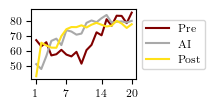

Participant id: 13
Bonus payment: 0.72
Followed: 5, Useful: 5, Average: 5.3
Usefulness per round: [7.0, 5.0, 5.0, 7.0, 4.0, 4.0]

Strategy with AI:
used what gave the highest amount

Strategy without AI:
tested each combo to see what gave the highest amount


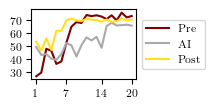

Participant id: 17
Bonus payment: 0.89
Followed: 5, Useful: 2, Average: 1.3
Usefulness per round: [2.0, 2.0, 1.0, 1.0, 1.0, 1.0]

Strategy with AI:
Do whatever AI said and then do random stuff for the others

Strategy without AI:
Try to use as many patterns as possible. Didn't work that well


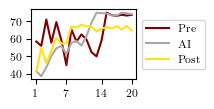

Participant id: 21
Bonus payment: 1.83
Followed: 6, Useful: 5, Average: 4.5
Usefulness per round: [5.0, 3.0, 4.0, 4.0, 6.0, 5.0]

Strategy with AI:
trying to compare how the changes affect the score and going by that while listening to its suggestions

Strategy without AI:
trying to compare how the changes affect the score and going by that


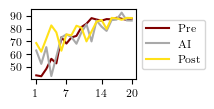

Participant id: 23
Bonus payment: 1.42
Followed: 6, Useful: 5, Average: 4.7
Usefulness per round: [5.0, 3.0, 5.0, 6.0, 3.0, 6.0]

Strategy with AI:
I did tend to switch to their suggestion but then stuck to a good combination. 

Strategy without AI:
I tried not to try too many different combinations once I had found a combination with a good score. 


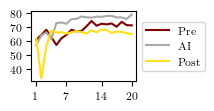

Participant id: 25
Bonus payment: 1.3
Followed: 7, Useful: 6, Average: 5.3
Usefulness per round: [3.0, 6.0, 6.0, 6.0, 6.0, 5.0]

Strategy with AI:
Working around the AI suggestions

Strategy without AI:
Following the same type of pattern for each round. 


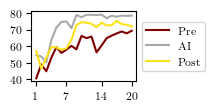

Participant id: 27
Bonus payment: 1.69
Followed: 1, Useful: 1, Average: 1.0
Usefulness per round: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Strategy with AI:
I didnt use the AI at all and continued with trying every combination once

Strategy without AI:
try every single combination once


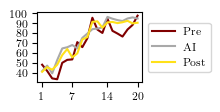

Participant id: 29
Bonus payment: 0.96
Followed: 6, Useful: 5, Average: 4.2
Usefulness per round: [2.0, 3.0, 5.0, 6.0, 5.0, 4.0]

Strategy with AI:
same as above - but ensured the ones ai chose were still included on my lines 

Strategy without AI:
i used some of the highest point rows and copied that row to gain extra points


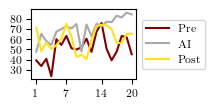

Participant id: 33
Bonus payment: 0.75
Followed: 1, Useful: 1, Average: 2.2
Usefulness per round: [3.0, 2.0, 2.0, 2.0, 2.0, 2.0]

Strategy with AI:
I went a bit random with my selections and once I found one that scored high points I get repeating it. I didn't use the AI.

Strategy without AI:
I used the AI assistant for the first round and didn't do well so I just went with my judgement for the rest of the game and did better not using the AI tool.


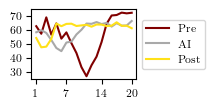

Participant id: 35
Bonus payment: 1.53
Followed: 5, Useful: 6, Average: 4.8
Usefulness per round: [2.0, 6.0, 7.0, 6.0, 2.0, 6.0]

Strategy with AI:
Same as my own, but trying the different variations so the AI would have feedback on what was working and what didn't.  Then using the highest combination to accumulate points.

Strategy without AI:
I tried different variations until I landed on a good number combination.  Then I would continue with that variation until I ran out of turns.


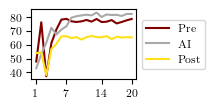

Participant id: 37
Bonus payment: 0.73
Followed: 7, Useful: 6, Average: 5.8
Usefulness per round: [5.0, 6.0, 6.0, 6.0, 6.0, 6.0]

Strategy with AI:
Used the AI's suggestions then changed the other boxes

Strategy without AI:
Tried various combinations then repeated on the best one I found


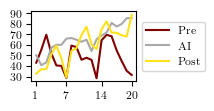

Participant id: 39
Bonus payment: 1.32
Followed: 5, Useful: 7, Average: 5.5
Usefulness per round: [6.0, 4.0, 6.0, 5.0, 6.0, 6.0]

Strategy with AI:
get above 120 and then repeat

Strategy without AI:
get above 120 and then repeat


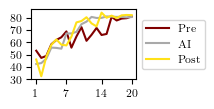

Participant id: 41
Bonus payment: 1.31
Followed: 6, Useful: 6, Average: 5.8
Usefulness per round: [7.0, 5.0, 6.0, 6.0, 6.0, 5.0]

Strategy with AI:
I relied more on the AI suggestions.

Strategy without AI:
I trialled and checked to see if error.


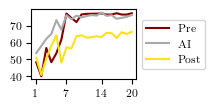

Participant id: 43
Bonus payment: 0.9
Followed: 6, Useful: 5, Average: 4.0
Usefulness per round: [6.0, 6.0, 3.0, 5.0, 1.0, 3.0]

Strategy with AI:
I take the AI suggestion and tweak it

Strategy without AI:
I ried to tweak till I get the optimal result


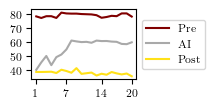

Participant id: 45
Bonus payment: 1.6
Followed: 5, Useful: 5, Average: 5.5
Usefulness per round: [6.0, 5.0, 5.0, 7.0, 5.0, 5.0]

Strategy with AI:
Try suggestions but ignore if already good options selected

Strategy without AI:
Trial and error then stick with the best


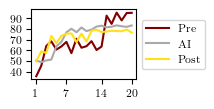

Participant id: 47
Bonus payment: 1.2
Followed: 5, Useful: 5, Average: 4.5
Usefulness per round: [5.0, 5.0, 5.0, 4.0, 3.0, 5.0]

Strategy with AI:
I used the suggested combinations initially, if they did not produce good results I would experiment as before. 

Strategy without AI:
Experiment with different combinations until one that averaged above 110 was found. This combination would then be repeated.


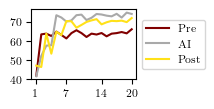

Participant id: 51
Bonus payment: 1.78
Followed: 5, Useful: 4, Average: 3.0
Usefulness per round: [4.0, 4.0, 4.0, 1.0, 1.0, 4.0]

Strategy with AI:
None

Strategy without AI:
Just guessed 


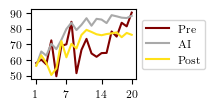

Participant id: 53
Bonus payment: 1.47
Followed: 2, Useful: 3, Average: 3.3
Usefulness per round: [4.0, 2.0, 5.0, 4.0, 2.0, 3.0]

Strategy with AI:
same as above- the AI was not very helpful especially in only giving half of the possible squares

Strategy without AI:
Start by broadly changing all the colours to match, and then seeing what gave the highest score, and then changed individual blocks at a time, keeping them if they increased the score or reverting them if they reduced it. Kept going until I got a score I was happy with and then kept that for the remainder of the round


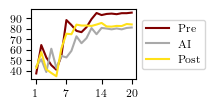

Participant id: 57
Bonus payment: 1.01
Followed: 6, Useful: 6, Average: 5.0
Usefulness per round: [5.0, 2.0, 5.0, 5.0, 7.0, 6.0]

Strategy with AI:
By following its suggestions.

Strategy without AI:
Through random selections.


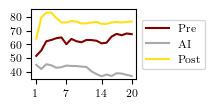

Participant id: 59
Bonus payment: 0.44
Followed: 6, Useful: 5, Average: 3.5
Usefulness per round: [2.0, 5.0, 5.0, 4.0, 3.0, 2.0]

Strategy with AI:
followed ai

Strategy without AI:
followed the % 


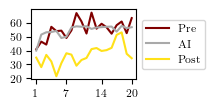

In [4]:
local_participants = [participant_data for participant_data in participants_data if participant_data["experimentData"]["recommendationType"] == "low"]

plot_performance_pre_ai_post_per_participant(local_participants)

### Results of participants in the global setting

Participant id: 2
Bonus payment: 0.95
Followed: 7, Useful: 5, Average: 5.2
Usefulness per round: [5.0, 3.0, 7.0, 7.0, 6.0, 3.0]

Strategy with AI:
I followed the Ai instrcutions

Strategy without AI:
i tried random combos to see what the highest score was


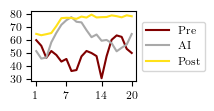

Participant id: 4
Bonus payment: 1.42
Followed: 3, Useful: 5, Average: 4.3
Usefulness per round: [7.0, 5.0, 2.0, 5.0, 2.0, 5.0]

Strategy with AI:
I always used the AI's suggestion to start off with then worked it out myself

Strategy without AI:
Trial and error until I got a good number then stuck to it


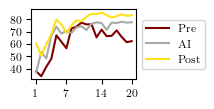

Participant id: 6
Bonus payment: 0.95
Followed: 5, Useful: 5, Average: 4.7
Usefulness per round: [1.0, 7.0, 7.0, 5.0, 7.0, 1.0]

Strategy with AI:
Used the Ai's suggestions, then observed how high the rewards werre

Strategy without AI:
Used different colour patterns for the combos


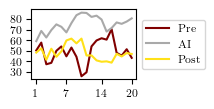

Participant id: 8
Bonus payment: 0.85
Followed: 4, Useful: 5, Average: 3.7
Usefulness per round: [2.0, 1.0, 6.0, 6.0, 1.0, 6.0]

Strategy with AI:
the same as above just trying to get the most amount of points

Strategy without AI:
tried to get the most amount of points


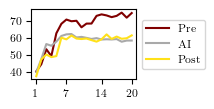

Participant id: 10
Bonus payment: 1.07
Followed: 6, Useful: 6, Average: 7.0
Usefulness per round: [7.0, 7.0, 7.0, 7.0, 7.0, 7.0]

Strategy with AI:
followed the advice that AI gave

Strategy without AI:
choose the combination which gave highest points


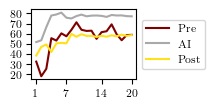

Participant id: 14
Bonus payment: 1.38
Followed: 4, Useful: 4, Average: 2.7
Usefulness per round: [2.0, 2.0, 2.0, 2.0, 2.0, 6.0]

Strategy with AI:
i used the same method 

Strategy without AI:
just try 3 or 4 ways and then go with the biggest reward 


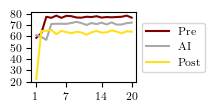

Participant id: 16
Bonus payment: 0.47
Followed: 4, Useful: 4, Average: 4.5
Usefulness per round: [4.0, 4.0, 5.0, 6.0, 6.0, 2.0]

Strategy with AI:
NONE

Strategy without AI:
NONE


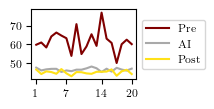

Participant id: 18
Bonus payment: 1.28
Followed: 6, Useful: 6, Average: 5.7
Usefulness per round: [4.0, 6.0, 4.0, 6.0, 7.0, 7.0]

Strategy with AI:
Follow the AI suggestions.

Strategy without AI:
Try different combinations and achieve the maximum points.


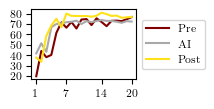

Participant id: 20
Bonus payment: 1.16
Followed: 7, Useful: 7, Average: 7.0
Usefulness per round: [7.0, 7.0, 7.0, 7.0, 7.0, 7.0]

Strategy with AI:
Just follow AI suggestions

Strategy without AI:
Checked what colour earns better


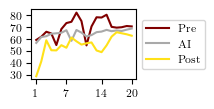

Participant id: 22
Bonus payment: 1.31
Followed: 7, Useful: 6, Average: 6.2
Usefulness per round: [5.0, 6.0, 6.0, 7.0, 6.0, 7.0]

Strategy with AI:
Follow AI suggestions

Strategy without AI:
Mix and match and stick when finding a decent point score


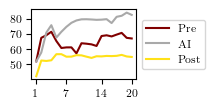

Participant id: 24
Bonus payment: 1.42
Followed: 7, Useful: 6, Average: 5.8
Usefulness per round: [6.0, 7.0, 7.0, 5.0, 4.0, 6.0]

Strategy with AI:
once the AI got on a decent point combo, id try different inner box combos to max points, this worked ok. sometimes led to less.

Strategy without AI:
I attempted a few combos to figure out which boxes to change once I got something over average id keep those points and go.


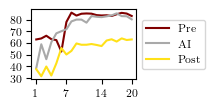

Participant id: 26
Bonus payment: 1.18
Followed: 7, Useful: 7, Average: 5.3
Usefulness per round: [7.0, 7.0, 4.0, 6.0, 5.0, 3.0]

Strategy with AI:
I followed the colours the AI suggested.

Strategy without AI:
If points went up for a box, then went lower if changed the colour, I would go back to that colour box and stay with that.


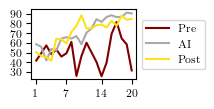

Participant id: 28
Bonus payment: 1.25
Followed: 7, Useful: 7, Average: 6.0
Usefulness per round: [7.0, 5.0, 7.0, 5.0, 6.0, 6.0]

Strategy with AI:
I did the same strategy as before but I used the AI to suggest what combinations to try and then when I found the

Strategy without AI:
i tried out a few different colour combinations for the first few rounds and then I used the highest scoring combination of the ones I tried, i did the rest of the rounds in that combination.


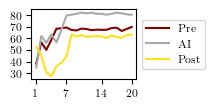

Participant id: 30
Bonus payment: 1.41
Followed: 7, Useful: 7, Average: 6.2
Usefulness per round: [7.0, 7.0, 6.0, 5.0, 6.0, 6.0]

Strategy with AI:
I focused more on the rectangle choices than the squares, but I did try to change the squares around often to see if I could find a more valuable pattern. When I got a high enough point value from a pattern, I just kept repeating it to get as many points out of it as possible.

Strategy without AI:
I was more focused on the squares than I was the rectangle, but I don't believe I had much luck figuring it out. 


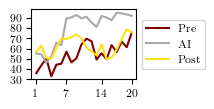

Participant id: 32
Bonus payment: 1.69
Followed: 5, Useful: 6, Average: 4.7
Usefulness per round: [6.0, 5.0, 6.0, 4.0, 4.0, 3.0]

Strategy with AI:
Same as above.  Kept an eye on the AI choice to decide which pattern to check next, especially for the first few choices of each round, until I was pretty sure which backgrounds were most likely.

Strategy without AI:
Methodical testing of patterns and choosing variations on whatever gave higher scores.  Finished the round by continuing to choose the highest score so far hen I ran out of what I figured were likely combinations to test.


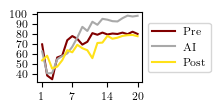

Participant id: 34
Bonus payment: 1.44
Followed: 7, Useful: 7, Average: 5.7
Usefulness per round: [4.0, 7.0, 6.0, 5.0, 6.0, 6.0]

Strategy with AI:
waited for the highest AI value and stuck with it

Strategy without AI:
I found the highest value and stuck with it


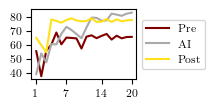

Participant id: 36
Bonus payment: 0.23
Followed: 3, Useful: 6, Average: 4.2
Usefulness per round: [4.0, 3.0, 5.0, 5.0, 5.0, 3.0]

Strategy with AI:
Tried to copy what AI was displaying

Strategy without AI:
Tried to find the different combos of the colours that i thought were higher in value


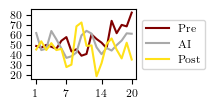

Participant id: 38
Bonus payment: 1.17
Followed: 6, Useful: 6, Average: 5.3
Usefulness per round: [5.0, 6.0, 6.0, 6.0, 3.0, 6.0]

Strategy with AI:
follow the patterns of rectangles

Strategy without AI:
choose color combinations and observe points


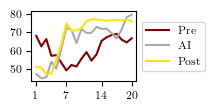

Participant id: 40
Bonus payment: 1.52
Followed: 5, Useful: 5, Average: 4.8
Usefulness per round: [7.0, 6.0, 6.0, 2.0, 4.0, 4.0]

Strategy with AI:
Followed AI 

Strategy without AI:
Take each square at a time and see which gave the most points


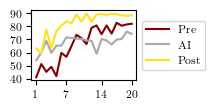

Participant id: 42
Bonus payment: 1.51
Followed: 5, Useful: 5, Average: 5.5
Usefulness per round: [5.0, 7.0, 6.0, 7.0, 2.0, 6.0]

Strategy with AI:
find a good scoring set and tweak or maintain

Strategy without AI:
test and change and when over 100 tried to maintain a high score over average


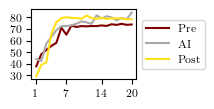

Participant id: 44
Bonus payment: 1.17
Followed: 5, Useful: 5, Average: 4.5
Usefulness per round: [5.0, 5.0, 4.0, 5.0, 4.0, 4.0]

Strategy with AI:
I tried the initial combination independently, but then was happy to take a suggestion from AI

Strategy without AI:
When I picked a more lucrative colour combination, I tended to follow this pattern through several rounds.


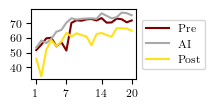

Participant id: 46
Bonus payment: 0.68
Followed: 5, Useful: 2, Average: 2.7
Usefulness per round: [2.0, 1.0, 4.0, 5.0, 2.0, 2.0]

Strategy with AI:
Using its recommendations

Strategy without AI:
Choosing the colour combo with higher points


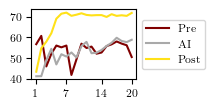

Participant id: 48
Bonus payment: 1.24
Followed: 4, Useful: 5, Average: 4.2
Usefulness per round: [3.0, 5.0, 3.0, 3.0, 5.0, 6.0]

Strategy with AI:
The same 

Strategy without AI:
Checking the boxes to see what difference it made 


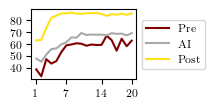

Participant id: 50
Bonus payment: 1.01
Followed: 5, Useful: 5, Average: 4.2
Usefulness per round: [4.0, 2.0, 4.0, 4.0, 6.0, 5.0]

Strategy with AI:
Followed the AIs suggestions until I found a score around 120+, then spammed that combination for the rest of the round.

Strategy without AI:
Tried different combinations until I found a score around 120, then spammed that combination for the rest of the round.


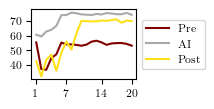

Participant id: 54
Bonus payment: 1
Followed: 6, Useful: 6, Average: 6.0
Usefulness per round: [5.0, 5.0, 7.0, 7.0, 5.0, 7.0]

Strategy with AI:
I just followed what it said but i think it was trying to direct me as to which inner square to choose too which was interesting 

Strategy without AI:
I just tried to find the highest number i could and stuck to it 


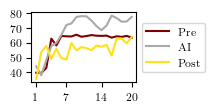

Participant id: 56
Bonus payment: 1.22
Followed: 7, Useful: 7, Average: 6.2
Usefulness per round: [7.0, 6.0, 6.0, 6.0, 6.0, 6.0]

Strategy with AI:
I looked at the colours they suggested and just did trial and error and found i'd  find the colour combination quicker.

Strategy without AI:
it was just a case of trial and error. trying different combinations


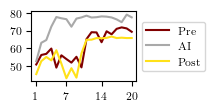

Participant id: 58
Bonus payment: 1.13
Followed: 5, Useful: 5, Average: 5.3
Usefulness per round: [6.0, 6.0, 6.0, 6.0, 3.0, 5.0]

Strategy with AI:
I experimented so it could learn.

Strategy without AI:
I just experimented with combos


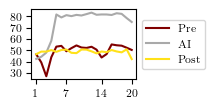

In [5]:
global_participants = [participant_data for participant_data in participants_data if participant_data["experimentData"]["recommendationType"] == "high"]

plot_performance_pre_ai_post_per_participant(global_participants)